In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer # VADER https://github.com/cjhutto/vaderSentiment
from nltk import tokenize

f:\fy_project\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
df = pd.read_csv("headlines_csv/combine.csv")
dj_df = pd.read_csv("DJIA_table.csv")

In [9]:
df.describe()
df.Date = pd.to_datetime(df.Date)
df.head()
df.index = df.Date
df.head()

,Date,Direction,Headline,Headline.1,Headline.2,Headline.3,Headline.4,Headline.5,Headline.6,Headline.7,...,Headline.77,Headline.78,Headline.79,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,2006-01-01,0.0,"With Charges Aired, Coach Is Suspended And In...",Bankruptcy? Tougher Than Counseling a Soprano,"At New York's Mayoral Inaugurations, Ask Not ...",Antidepressants Seem to Cut Suicide Risk in T...,Can You Revive an Extinct Animal?,"Paid Notice: Memorials BIGGART, EMILY B.",Maybe the Stock Pickers Have Gone Fishing,Something to Say About the Movie? By All Mean...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02,2006-01-02,0.0,STATES TAKE LEAD IN PUSH TO RAISE MINIMUM WAGES,BUSINESS DIGEST,"Holiday Is Over, but the Business Goes On; In...",Sports of The Times; Barber as the M.V.P. Wou...,'Casanova' Illuminated By Masters Of Baroque,Sunni Rights and Wrongs in Iraq,Advertising's Twilight Zone: That Signpost Up...,Pakistanis Back Off Vow To Control Seminaries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,2006-01-03,1.0,The Risks of Screenings,"Well Served As Patients, Dissatisfied As Cust...",4 Arrested in Theft of Baby Jesus Figurines,The Depression-Holiday Link,Risks Ahead As Policies (And Money) Tighten i...,Union Dissidents Say Transit Leader Gave Away...,"How's Business? Picking Up, With a Smile",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,2006-01-04,1.0,BUSINESS DIGEST,Woman in the News: Christine Callaghan Quinn;...,"Paid Notice: Deaths WEISS, BLANCHE",Caught Up in a Turf War On Winnipeg's Mean St...,"Awaiting Word From Below, Relatives Honor the...","Apartment Sales Decline, But Manhattan Prices...","Paid Notice: Deaths MCCARTHY, LAWRENCE F.",National Briefing | New England: Massachusett...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,2006-01-05,1.0,Apple of Someone Else's Eye,Smile Like You Mean It,The Hazards and Rewards Of Opening With a Low...,BUSINESS DIGEST,"Paid Notice: Deaths RUBIN, EMILY",Inquiry in 1992 Mob Killing Focuses on Ex-F.B...,Russia and Ukraine Reach Compromise on Natura...,"Paid Notice: Deaths MCCARTHY, LAWRENCE F.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dj_df.describe()
dj_df.Date = pd.to_datetime(dj_df.Date)
dj_df.index = dj_df.Date
dj_df = dj_df.sort_values(by = 'Date', ascending=True)
dj_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2008-08-08,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update('nan')

# Create a single string for each date (since we only want to look at word counts)
news_combined = ''
for row in range(0,len(df.index)):
    news_combined+=' '.join(str(x).lower().strip() for x in df.iloc[row,2:82])
    
vectorizer = CountVectorizer()
news_vect = vectorizer.build_tokenizer()(news_combined)
word_counts = pd.DataFrame([[x,news_vect.count(x)] for x in set(news_vect)], columns = ['Word', 'Count'])

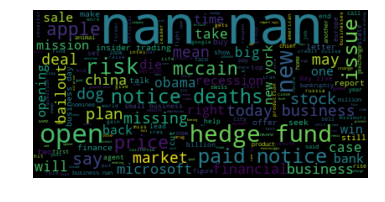

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(news_combined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate('text')
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
plt.show()

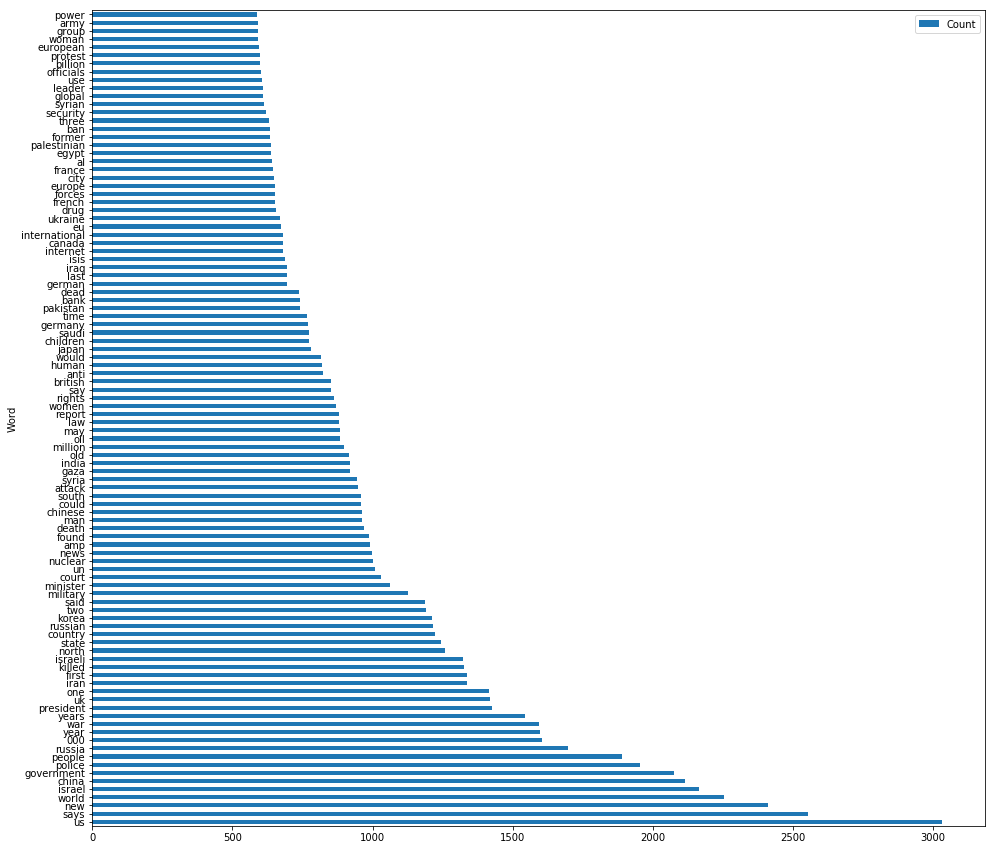

In [10]:
word_counts_adj = word_counts
word_counts_adj = word_counts_adj .reset_index(drop=True)

for i in word_counts['Word']:
    if i in stop:
        word_counts_adj = word_counts_adj.drop(word_counts_adj[word_counts_adj['Word'] == i].index)
        
word_counts_adj.index = word_counts_adj['Word']
counts = word_counts_adj.sort_values(by='Count', ascending=False)[0:100].plot(kind='barh', figsize = (16,15))
plt.show()

In [29]:
scores = pd.DataFrame(index = df.Date, columns = ['Compound', 'Positive', 'Negative', "Neutral"])

analyzer = SentimentIntensityAnalyzer() # Use the VADER Sentiment Analyzer

for j in range(1,df.shape[0]):    
    tmp_neu = 0
    tmp_neg = 0
    tmp_pos = 0
    tmp_comp = 0
    for i in range(2,df.shape[1]):
        text = df.iloc[j,i]
        if(str(text) == "nan"):
            tmp_comp +=  0
            tmp_neg += 0
            tmp_neu += 0
            tmp_pos += 0
        else:
            vs = analyzer.polarity_scores(df.iloc[j,i])
            tmp_comp +=  vs['compound']
            tmp_neg += vs['neg']
            tmp_neu += vs['neu']
            tmp_pos += vs['pos']
    
    scores.iloc[j,] = [tmp_comp, tmp_pos, tmp_neg, tmp_neu]

In [30]:
scores.head()
scores = scores.dropna()

In [31]:
scores.head()

,Compound,Positive,Negative,Neutral
Date,,,,
2006-01-02,0.2144,0.11,0,8.89
2006-01-03,-0.7899,0.549,1.229,5.221
2006-01-04,-0.9896,0.808,1.411,9.781
2006-01-05,0.0741,1.254,0.967,12.779
2006-01-06,-1.6048,0.691,1.884,11.424


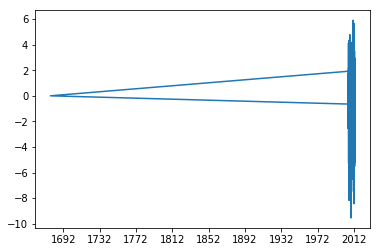

In [32]:
scores.index = scores.index.to_datetime()
plt.plot(scores.Compound)
plt.show()

In [16]:
plt.plot(scores.index, scores.Compound.shift(1)/scores.Compound-1)
plt.show()

plt.plot(dj_df.Date, dj_df.Close.shift(1)/dj_df.Close-1)
plt.show()

ZeroDivisionError: float division by zero

In [33]:
merged = scores.join(df)
merged = merged.iloc[:, 0:6]
merged = merged.iloc[2:,]
merged = merged.dropna()
print merged

           Compound Positive Negative Neutral       Date  Direction
Date                                                               
2006-01-04  -0.9896    0.808    1.411   9.781 2006-01-04        1.0
2006-01-05   0.0741    1.254    0.967  12.779 2006-01-05        1.0
2006-01-06  -1.6048    0.691    1.884  11.424 2006-01-06        1.0
2006-01-07  -0.7364        0    0.673   9.327 2006-01-07        0.0
2006-01-08  -0.4253    2.507    3.413  20.083 2006-01-08        0.0
2006-01-09   0.6567    0.925    0.845   13.23 2006-01-09        1.0
2006-01-10  -1.3707    0.512    2.129   12.36 2006-01-10        1.0
2006-01-11  -0.1661    1.287    1.578  29.135 2006-01-11        1.0
2006-01-12   1.7789    2.322    1.021  21.657 2006-01-12        0.0
2006-01-13   0.0179    0.814    0.731   9.455 2006-01-13        0.0
2006-01-14  -0.3658    0.541    1.091  10.368 2006-01-14        0.0
2006-01-15   1.5298    2.901    1.198  18.901 2006-01-15        0.0
2006-01-17  -0.3074    1.048    1.294  11.658 20

In [34]:
train = merged[merged.index < '2011-01-01']
test = merged[merged.index > '2010-12-31']
print train.head()
print test.head()

           Compound Positive Negative Neutral       Date  Direction
Date                                                               
2006-01-04  -0.9896    0.808    1.411   9.781 2006-01-04        1.0
2006-01-05   0.0741    1.254    0.967  12.779 2006-01-05        1.0
2006-01-06  -1.6048    0.691    1.884  11.424 2006-01-06        1.0
2006-01-07  -0.7364        0    0.673   9.327 2006-01-07        0.0
2006-01-08  -0.4253    2.507    3.413  20.083 2006-01-08        0.0
           Compound Positive Negative Neutral       Date  Direction
Date                                                               
2011-01-01  -1.5514    0.444    1.814   8.742 2011-01-01        0.0
2011-01-02   2.0472     2.67    0.876  14.455 2011-01-02        0.0
2011-01-03   1.6433    2.334    0.893   9.773 2011-01-03        1.0
2011-01-04  -1.1667    2.098    3.681  17.222 2011-01-04        1.0
2011-01-05   0.7742    2.386    1.679  26.935 2011-01-05        1.0


In [35]:
basictrain = train[['Compound','Positive', 'Negative']].copy()
# basictrain = basictrain.values.reshape(-1,1)
print basictrain

           Compound Positive Negative
Date                                 
2006-01-04  -0.9896    0.808    1.411
2006-01-05   0.0741    1.254    0.967
2006-01-06  -1.6048    0.691    1.884
2006-01-07  -0.7364        0    0.673
2006-01-08  -0.4253    2.507    3.413
2006-01-09   0.6567    0.925    0.845
2006-01-10  -1.3707    0.512    2.129
2006-01-11  -0.1661    1.287    1.578
2006-01-12   1.7789    2.322    1.021
2006-01-13   0.0179    0.814    0.731
2006-01-14  -0.3658    0.541    1.091
2006-01-15   1.5298    2.901    1.198
2006-01-17  -0.3074    1.048    1.294
2006-01-18  -0.2389    1.608    2.262
2006-01-19    0.124    1.267     0.91
2006-01-20   0.1316    1.219      1.3
2006-01-21   0.1749    0.542    0.553
2006-01-22  -0.6574    1.949    2.477
2006-01-23  -2.5809    0.236    2.946
2006-01-24  -2.2023    0.861    2.172
2006-01-25   1.7528    1.237        0
2006-01-26   0.3674    1.267    1.006
2006-01-27     0.62    1.865    1.642
2006-01-28  -1.0497    0.787    1.455
2006-01-29  

In [54]:
basicmodel = LogisticRegression(penalty = 'l2',solver='sag')
basicmodel = basicmodel.fit(basictrain, train["Direction"])

In [44]:
from sklearn.tree import DecisionTreeClassifier
basicmodel = DecisionTreeClassifier()
basicmodel = basicmodel.fit(basictrain,train["Direction"])

In [29]:
from sklearn.ensemble import RandomForestClassifier
basicmodel = RandomForestClassifier()
basicmodel = basicmodel.fit(basictrain,train["Direction"])

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
basicmodel = GradientBoostingClassifier()
basicmodel = basicmodel.fit(basictrain,train["Direction"])

In [55]:
basictest = test[['Compound','Positive', 'Negative']].copy()
# basictest = basictest.values.reshape(-1,1)
basicpredictions = basicmodel.predict(basictest)

In [56]:
print basicpredictions

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [57]:
pd.crosstab(test["Direction"], basicpredictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,426,19
1.0,232,28
